# Import the Models

In [2]:
# Import the models
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

# Load the Data

In [3]:
# Load the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

y_training = train["label"]
X_training = train.drop(labels = ["label"], axis = 1)

C:\Users\lauki\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

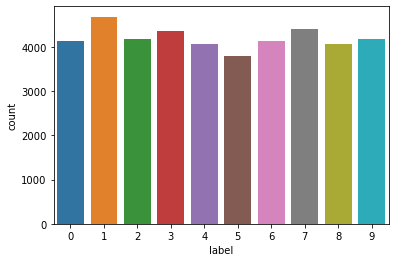

In [4]:
g = sns.countplot(y_training)
y_training.value_counts()

# CNN

In [5]:
print(X_training.shape)
print(y_training.shape)
print(test.shape)

(42000, 784)
(42000,)
(28000, 784)


In [6]:
X_training = X_training / 255.0
test = test / 255.0
X_training = X_training.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, test_size=0.2, random_state=4)

### Data Augmentation

In [8]:
datagen = ImageDataGenerator(rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode='nearest'
                            )
datagen.fit(X_train)

In [9]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation = "softmax"))

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(33600, 28, 28, 1)
(33600,)
(8400, 28, 28, 1)
(8400,)


In [13]:
batch_size = 64
epochs = 35
history = model.fit(
    datagen.flow(X_train, y_train, batch_size = batch_size),
    epochs = epochs, 
    validation_data = (X_val, y_val),
    verbose = 2, 
    steps_per_epoch = X_train.shape[0] // batch_size,
    callbacks=[learning_rate_reduction],
)

Epoch 1/35
525/525 - 9s - loss: 1.0699 - accuracy: 0.6382 - val_loss: 0.2523 - val_accuracy: 0.9261 - lr: 0.0010
Epoch 2/35
525/525 - 9s - loss: 0.4444 - accuracy: 0.8635 - val_loss: 0.1435 - val_accuracy: 0.9568 - lr: 0.0010
Epoch 3/35
525/525 - 9s - loss: 0.3364 - accuracy: 0.8960 - val_loss: 0.1364 - val_accuracy: 0.9546 - lr: 0.0010
Epoch 4/35
525/525 - 9s - loss: 0.2805 - accuracy: 0.9152 - val_loss: 0.1167 - val_accuracy: 0.9662 - lr: 0.0010
Epoch 5/35
525/525 - 9s - loss: 0.2491 - accuracy: 0.9232 - val_loss: 0.1150 - val_accuracy: 0.9661 - lr: 0.0010
Epoch 6/35
525/525 - 10s - loss: 0.2294 - accuracy: 0.9305 - val_loss: 0.1068 - val_accuracy: 0.9685 - lr: 0.0010
Epoch 7/35
525/525 - 9s - loss: 0.2107 - accuracy: 0.9345 - val_loss: 0.1013 - val_accuracy: 0.9715 - lr: 0.0010
Epoch 8/35
525/525 - 9s - loss: 0.2029 - accuracy: 0.9392 - val_loss: 0.0985 - val_accuracy: 0.9702 - lr: 0.0010
Epoch 9/35
525/525 - 9s - loss: 0.1908 - accuracy: 0.9417 - val_loss: 0.0772 - val_accuracy: 0.

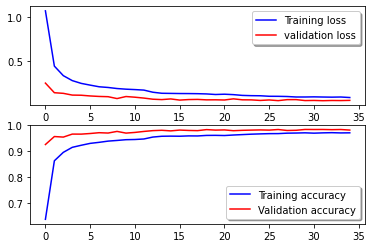

In [14]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

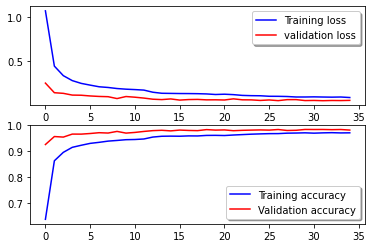

In [15]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# Submission

In [16]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [17]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission_digit_recognizer.csv",index=False)